<h1>Amazon Stock Price Detection</h1>

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/amazon-stock-price-all-time/Amazon.csv


# Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/amazon-stock-price-all-time/Amazon.csv")

In [3]:
viz = df.copy()

In [4]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(6155, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6155 non-null   object 
 1   Open       6155 non-null   float64
 2   High       6155 non-null   float64
 3   Low        6155 non-null   float64
 4   Close      6155 non-null   float64
 5   Adj Close  6155 non-null   float64
 6   Volume     6155 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 336.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6155.0,5.205563e+02,8.571617e+02,1.406250,3.875000e+01,9.267000e+01,5.289500e+02,3.744000e+03
High,6155.0,5.262161e+02,8.658210e+02,1.447917,3.951500e+01,9.419000e+01,5.353050e+02,3.773080e+03
Low,6155.0,5.142773e+02,8.472709e+02,1.312500,3.810500e+01,9.075000e+01,5.219500e+02,3.696790e+03
Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Adj Close,6155.0,5.204298e+02,8.566685e+02,1.395833,3.882125e+01,9.264000e+01,5.294500e+02,3.731410e+03
Volume,6155.0,7.329010e+06,7.149521e+06,487200.000000,3.579350e+06,5.470000e+06,8.294950e+06,1.043292e+08


# Train & Test Splitting the Data

In [9]:
train, test = train_test_split(df, test_size = 0.2)

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2812,2008-07-21,69.519997,69.800003,66.300003,68.480003,68.480003,6896900
4476,2015-03-02,380.850006,385.899994,379.480011,385.660004,385.660004,2139200
285,1998-07-02,19.291668,20.916668,18.750000,20.666668,20.666668,52279800
4931,2016-12-16,765.000000,765.130005,754.000000,757.770020,757.770020,4848200
2748,2008-04-18,76.480003,82.000000,76.320000,80.099998,80.099998,16791300
2240,2006-04-11,36.610001,36.750000,35.520000,36.060001,36.060001,6605600
1779,2004-06-14,49.340000,49.990002,49.040001,49.250000,49.250000,5180900
1784,2004-06-21,49.450001,50.299999,49.250000,49.770000,49.770000,4490300
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200
1171,2002-01-11,11.030000,11.340000,10.930000,11.030000,11.030000,4276800


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3453,2011-02-03,173.500000,174.669998,171.949997,173.710007,173.710007,3678900
1671,2004-01-07,52.180000,52.660000,50.939999,51.900002,51.900002,9242700
1544,2003-07-08,38.759998,40.830002,38.750000,40.509998,40.509998,12145400
2297,2006-07-03,38.520000,38.619999,38.230000,38.610001,38.610001,1436300
4596,2015-08-20,530.390015,533.250000,515.770020,515.780029,515.780029,4408000
1282,2002-06-21,17.600000,17.790001,17.340000,17.530001,17.530001,5176800
2635,2007-11-05,84.349998,86.019997,82.760002,84.370003,84.370003,7453100
3162,2009-12-08,134.300003,136.080002,132.869995,134.110001,134.110001,8002800
2462,2007-03-01,39.320000,39.320000,38.049999,38.849998,38.849998,9255800
1921,2005-01-04,42.669998,43.259998,41.500000,42.139999,42.139999,19418500


In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

# Logistic Regression

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

# Visualizing the Data

In [16]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [17]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-17,NaN
1997-05-18,NaN
1997-05-19,1.708333
...,...
2021-10-23,NaN
2021-10-24,NaN
2021-10-25,3320.370117


In [18]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to black

    ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
    ax.spines['bottom'].set_color('white')      #setting up above X-axis tick color to red

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

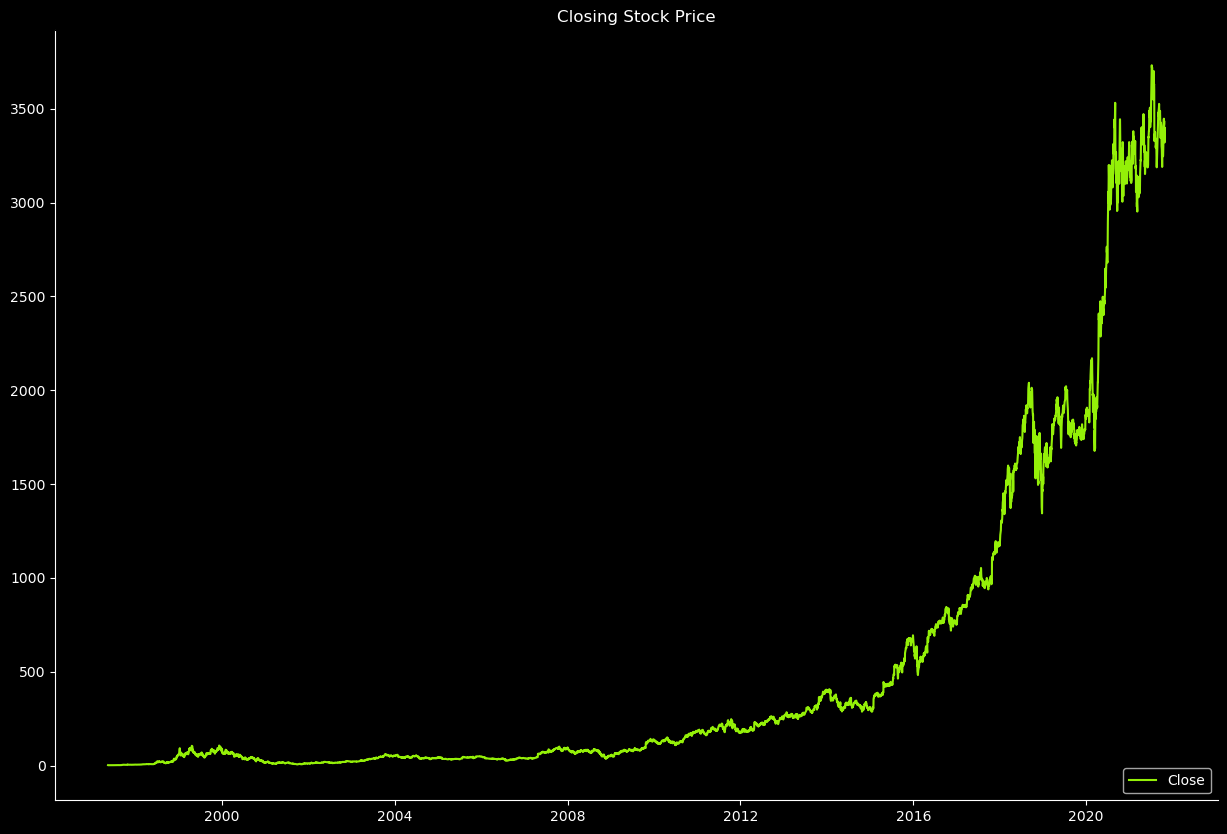

In [19]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

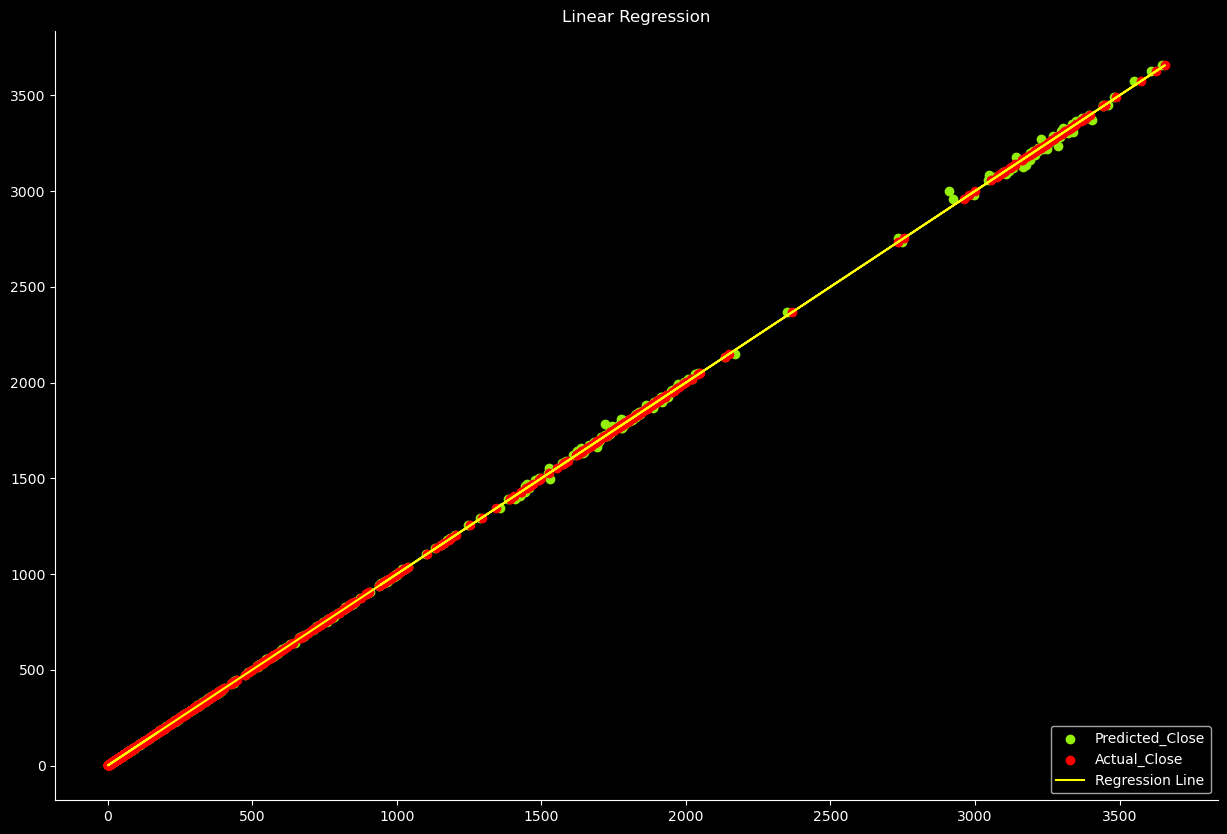

In [20]:
style()

plt.title('Linear Regression', color="white")
plt.scatter(y_pred, y_test, color="#94F008")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc ="lower right", facecolor='black', labelcolor='white')

# Model Evaluation

In [21]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 42.134
RMSE 6.491
MAE 2.472
MAPE 0.009
R2 Score :  1.0


In [22]:
pred_df = test.copy()
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume
3453,2011-02-03,173.500000,174.669998,171.949997,173.710007,173.710007,3678900
1671,2004-01-07,52.180000,52.660000,50.939999,51.900002,51.900002,9242700
1544,2003-07-08,38.759998,40.830002,38.750000,40.509998,40.509998,12145400
2297,2006-07-03,38.520000,38.619999,38.230000,38.610001,38.610001,1436300
4596,2015-08-20,530.390015,533.250000,515.770020,515.780029,515.780029,4408000
...,...,...,...,...,...,...,...
4738,2016-03-15,571.000000,581.520020,567.000000,577.020020,577.020020,3876800
262,1998-06-01,7.333333,7.375000,6.942708,7.135417,7.135417,8043600
4166,2013-12-04,383.500000,389.690002,381.489990,385.959991,385.959991,2355300
154,1997-12-23,4.687500,4.739583,4.625000,4.625000,4.625000,1177200


In [23]:
result = model.predict([[2.437500, 2.500000, 1.927083, 72156000]])
print(result)

[1.85839727]


In [24]:
pred_df['Close_Prediction'] = y_pred
pred_df

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
3453,2011-02-03,173.500000,174.669998,171.949997,173.710007,173.710007,3678900,173.350575
1671,2004-01-07,52.180000,52.660000,50.939999,51.900002,51.900002,9242700,51.654001
1544,2003-07-08,38.759998,40.830002,38.750000,40.509998,40.509998,12145400,40.534809
2297,2006-07-03,38.520000,38.619999,38.230000,38.610001,38.610001,1436300,38.479548
4596,2015-08-20,530.390015,533.250000,515.770020,515.780029,515.780029,4408000,521.144197
...,...,...,...,...,...,...,...,...
4738,2016-03-15,571.000000,581.520020,567.000000,577.020020,577.020020,3876800,576.730518
262,1998-06-01,7.333333,7.375000,6.942708,7.135417,7.135417,8043600,7.125541
4166,2013-12-04,383.500000,389.690002,381.489990,385.959991,385.959991,2355300,387.205772
154,1997-12-23,4.687500,4.739583,4.625000,4.625000,4.625000,1177200,4.784521


In [25]:
pred_df[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1231.0,500.424698,812.826505,1.489583,38.534999,92.370003,528.195007,3656.639893
Close_Prediction,1231.0,500.151284,812.400125,1.570001,38.546069,92.340053,526.262292,3648.122404


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you! For viewing this Notebook, do upvote if you like it and please feel free to provide feedback.</em>
<p style="text-align:center"><img src="https://cdn.pixabay.com/animation/2023/03/21/22/04/22-04-05-16_512.gif" width="480" height="200"></p>